# Data Science Programming1 -2

이거 하는건 공부를 효율적으로 하려고 하는거지, 이거 자체에 의미는 크게 없다.
편안한 마음으로 하자 

 # Moments Method (ERM은 나중에 공부하자)
 지난시간에  Moments Method & MLE를 통해서 파라미터를 추정했다. <br>
 그런데 우리는 이 parameter를 얼마나 신뢰할 수 있을까? 이번 강의는 이 주제로 공부한다.
 
  
# 밀도 추정 그래프 그리기
#density, bins, _ = plt.hist(data, bins=30, density=True, alpha=0)  # 히스토그램을 투명하게 그림
#plt.plot(bins, 1/(std_dev * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std_dev**2) ), linewidth=2, color='red')

 
 


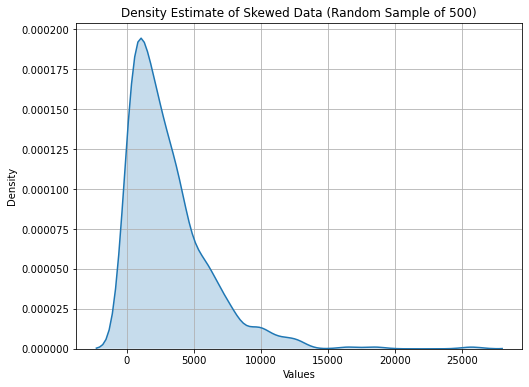

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_skewed_data(n, mean):
    skewed_data = np.round(np.random.exponential(scale=mean, size=n)).astype(int)
    return skewed_data

# 데이터 생성
n = 1500
mean = 3000
generated_data = generate_skewed_data(n, mean)

# 임의로 500명 추출
random_sample = np.random.choice(generated_data, size=500, replace=False)

# KDE 플롯 그리기
plt.figure(figsize=(8, 6))
sns.kdeplot(random_sample, shade=True)
plt.title('Density Estimate of Skewed Data (Random Sample of 500)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# 동일 횟수 추출 그래프 그리기

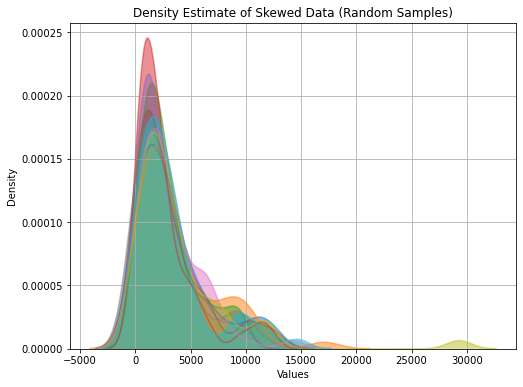

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_skewed_data(n, mean):
    skewed_data = np.round(np.random.exponential(scale=mean, size=n)).astype(int)
    return skewed_data

# Function to simulate sampling and plotting KDE
def simulate_sampling(n_samples, sample_size, data, title):
    plt.figure(figsize=(8, 6))
    for i in range(n_samples):
        # Random sampling from data
        random_sample = np.random.choice(data, size=sample_size, replace=False)
        # Plot KDE of random sample
        sns.kdeplot(random_sample, shade=True, alpha=0.5)

    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

# Parameters for generating skewed data
n = 1500
mean = 3000

# Generate skewed data
generated_data = generate_skewed_data(n, mean)

# Simulate sampling and plot KDE
simulate_sampling(n_samples=10, sample_size=55, data=generated_data,
                  title='Density Estimate of Skewed Data (Random Samples)')


# 5의 배수씩 출력하기

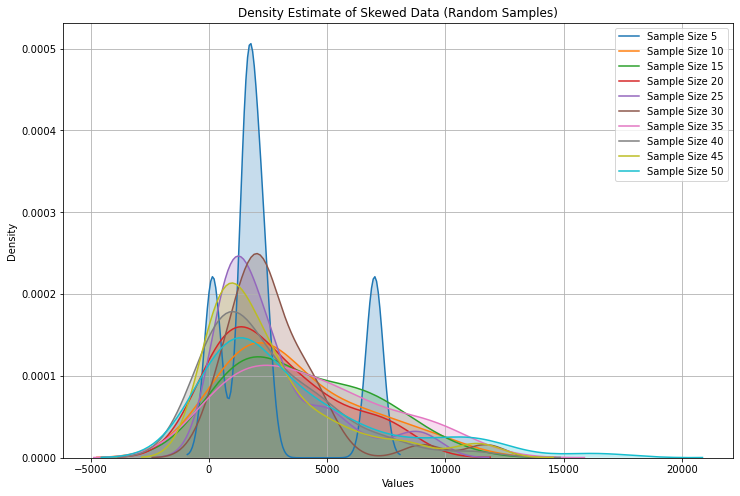

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_skewed_data(n, mean):
    skewed_data = np.round(np.random.exponential(scale=mean, size=n)).astype(int)
    return skewed_data

# 데이터 생성
n = 1500
mean = 3000
generated_data = generate_skewed_data(n, mean)

# KDE 플롯 그리기
plt.figure(figsize=(12, 8))

for size in range(5, 51, 5):
    # 임의로 size 개수만큼 추출
    random_sample = np.random.choice(generated_data, size=size, replace=False)
    sns.kdeplot(random_sample, shade=True, label=f'Sample Size {size}')

plt.title('Density Estimate of Skewed Data (Random Samples)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# 랜덤 추출

In [4]:
def sample_data(generated_data, num_samples=3, sample_size=5):
    samples = []
    for _ in range(num_samples):
        sample = np.random.choice(generated_data, size=sample_size, replace=False)
        samples.append(sample)
    return samples

# generate_skewed_data 함수로 데이터 생성
n = 1500
mean = 3000
generated_data = generate_skewed_data(n, mean)

# 데이터 샘플링
sampled_data = sample_data(generated_data, num_samples=3, sample_size=5)

# 출력
print("Sampled Data:")
for i, sample in enumerate(sampled_data):
    print(f"Sample {i+1}: {sample}")


Sampled Data:
Sample 1: [ 692 8768 1200 2130  522]
Sample 2: [1762  138  105  389 1026]
Sample 3: [ 2653 13726  4781  2315  5206]


#  중심극한 정리 실험 

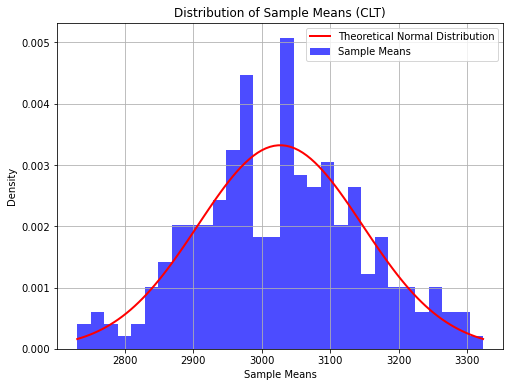

Theoretical mean of sample means: 3026.9442719999997
Theoretical standard deviation of sample means: 120.09913355100451


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_skewed_data(n, mean):
    skewed_data = np.round(np.random.exponential(scale=mean, size=n)).astype(int)
    return skewed_data

# 데이터 생성
n = 1500
mean = 3000
generated_data = generate_skewed_data(n, mean)

# 임의로 500명 추출
random_sample = np.random.choice(generated_data, size=500, replace=False)

# 중심극한정리 시뮬레이션
num_simulations = 250
sample_means = np.zeros(num_simulations)

for i in range(num_simulations):
    sample = np.random.choice(generated_data, size=500, replace=False)
    sample_mean = np.mean(sample)
    sample_means[i] = sample_mean

# 정규분포의 평균과 분산 계산
normal_mean = np.mean(sample_means)
normal_std = np.std(sample_means)

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.grid(True)

# 이론적인 정규분포와 비교
from scipy.stats import norm

x = np.linspace(np.min(sample_means), np.max(sample_means), 100)
y = norm.pdf(x, normal_mean, normal_std)
plt.plot(x, y, color='red', linewidth=2)

plt.legend(['Theoretical Normal Distribution', 'Sample Means'])
plt.show()

print(f"Theoretical mean of sample means: {normal_mean}")
print(f"Theoretical standard deviation of sample means: {normal_std}")


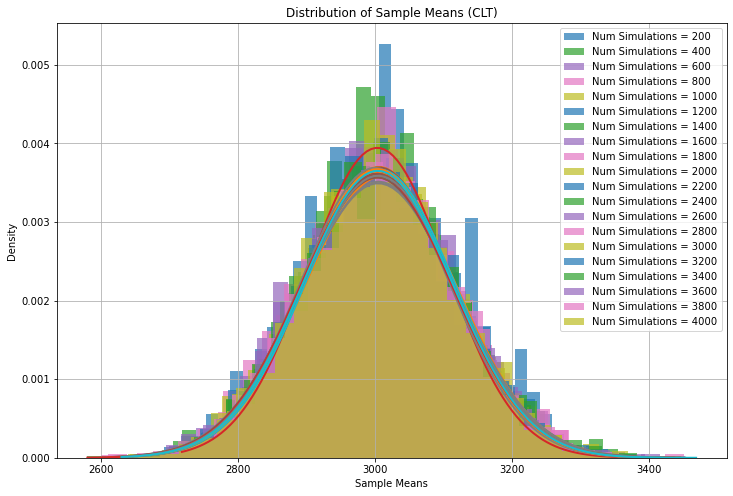

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_skewed_data(n, mean):
    skewed_data = np.round(np.random.exponential(scale=mean, size=n)).astype(int)
    return skewed_data

def plot_sample_means_distribution(min_simulations, max_simulations, increment, generated_data):
    plt.figure(figsize=(12, 8))
    plt.title('Distribution of Sample Means (CLT)')
    plt.xlabel('Sample Means')
    plt.ylabel('Density')
    plt.grid(True)

    for num_simulations in range(min_simulations, max_simulations + increment, increment):
        sample_means = np.zeros(num_simulations)
        
        for i in range(num_simulations):
            sample = np.random.choice(generated_data, size=500, replace=False)
            sample_mean = np.mean(sample)
            sample_means[i] = sample_mean
        
        # 정규분포의 평균과 분산 계산
        normal_mean = np.mean(sample_means)
        normal_std = np.std(sample_means)
        
        # 히스토그램 그리기
        plt.hist(sample_means, bins=30, density=True, alpha=0.7, label=f'Num Simulations = {num_simulations}')
        
        # 이론적인 정규분포와 비교
        x = np.linspace(np.min(sample_means), np.max(sample_means), 100)
        y = norm.pdf(x, normal_mean, normal_std)
        plt.plot(x, y, linewidth=2)

    # 범례 추가
    plt.legend()
    plt.show()

# 데이터 생성
n = 1500
mean = 3000
generated_data = generate_skewed_data(n, mean)

# 함수 호출하여 그래프 생성
plot_sample_means_distribution(200, 4000, 200, generated_data)


 인터넷 블로그에 있는 글은 진짜 믿고 거르자,
  진짜 제대로 이해 못하고 적은 사람들이 너무 많다.

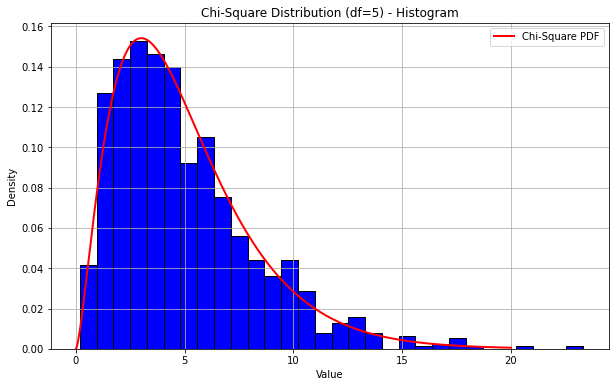

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 카이제곱 분포 생성
df = 5  # 자유도
samples = np.random.chisquare(df, size=1000)

# 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, color='blue', edgecolor='black')
plt.title(f'Chi-Square Distribution (df={df}) - Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# 밀도추정곡선
x = np.linspace(0, 20, 1000)
plt.plot(x, chi2.pdf(x, df), linewidth=2, color='red', label='Chi-Square PDF')
plt.legend()

plt.show()

 

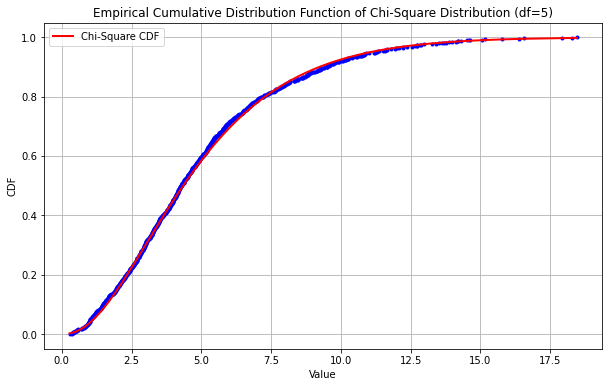

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 카이제곱 분포의 매개변수 설정 (자유도 = 5)
df = 5
num_samples_total = 1000

# 카이제곱 분포로부터 데이터 생성
data = np.random.chisquare(df, size=num_samples_total)

# ECDF를 그리기 위해 데이터 정렬
sorted_data = np.sort(data)
yvals = np.arange(len(sorted_data)) / float(len(sorted_data))

# Plot ECDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, yvals, marker='.', linestyle='none', color='blue')
plt.plot(sorted_data, chi2.cdf(sorted_data, df), color='red', linewidth=2, label='Chi-Square CDF')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title(f'Empirical Cumulative Distribution Function of Chi-Square Distribution (df={df})')
plt.legend()
plt.grid(True)
plt.show()


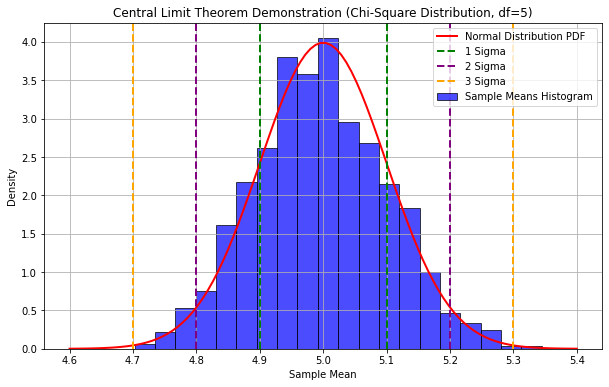

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

# 카이제곱 분포 생성
df = 5  # 자유도
num_samples = 1000  # 각 샘플의 크기
num_experiments = 1000  # 실험 횟수

# 중심극한정리 실험을 위한 데이터 생성
sample_means = np.zeros(num_experiments)

for i in range(num_experiments):
    # 각 실험에서 10개씩 데이터 추출
    samples = np.random.chisquare(df, size=num_samples)
    sample_mean = np.mean(samples)
    sample_means[i] = sample_mean

# 중심극한정리에 따른 정규분포 근사
mu = df  # 카이제곱 분포의 평균
sigma = np.sqrt(2 * df) / np.sqrt(num_samples)  # 카이제곱 분포의 표준편차, 중심극한정리에 따라 계산

# 정규분포를 이용한 밀도추정곡선 그리기
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black', label='Sample Means Histogram')
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Distribution PDF')

#시그마
plt.axvline(mu - sigma, color='green', linestyle='--', linewidth=2, label='1 Sigma')
plt.axvline(mu + sigma, color='green', linestyle='--', linewidth=2)
plt.axvline(mu - 2 * sigma, color='purple', linestyle='--', linewidth=2, label='2 Sigma')
plt.axvline(mu + 2 * sigma, color='purple', linestyle='--', linewidth=2)
plt.axvline(mu - 3 * sigma, color='orange', linestyle='--', linewidth=2, label='3 Sigma')
plt.axvline(mu + 3 * sigma, color='orange', linestyle='--', linewidth=2)
plt.title(f'Central Limit Theorem Demonstration (Chi-Square Distribution, df={df})')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


#함수 버전

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def central_limit_theorem_demo(df, num_samples, num_experiments):
    # 중심극한정리 실험을 위한 데이터 생성
    sample_means = np.zeros(num_experiments)

    for i in range(num_experiments):
        # 각 실험에서 데이터 추출
        samples = np.random.chisquare(df, size=num_samples)
        sample_mean = np.mean(samples)
        sample_means[i] = sample_mean

    # 중심극한정리에 따른 정규분포 근사
    mu = df  # 카이제곱 분포의 평균
    sigma = np.sqrt(2 * df / num_samples)  # 카이제곱 분포의 표준편차, 중심극한정리에 따라 계산

    # 정규분포를 이용한 밀도추정곡선 그리기
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
    plt.figure(figsize=(10, 6))
    plt.hist(sample_means, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black', label='Sample Means Histogram')
    plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Distribution PDF')

    # Sigma 범위 표시
    for n in range(1, 4):
        plt.axvline(mu - n * sigma, color='green', linestyle='--', linewidth=2, label=f'{n} Sigma')
        plt.axvline(mu + n * sigma, color='green', linestyle='--', linewidth=2)

    plt.title(f'Central Limit Theorem Demonstration (Chi-Square Distribution, df={df})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# 파라미터 설정
df = 5  # 자유도
num_samples = 10  # 각 샘플의 크기
num_experiments = 1000  # 실험 횟수

# 함수 호출
central_limit_theorem_demo(df, num_samples, num_experiments)


#클래스 버전

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

class CentralLimitTheoremDemo:
    def __init__(self, df, num_samples, num_experiments):
        self.df = df
        self.num_samples = num_samples
        self.num_experiments = num_experiments
        self.sample_means = np.zeros(num_experiments)

    def generate_samples(self):
        for i in range(self.num_experiments):
            samples = np.random.chisquare(self.df, size=self.num_samples)
            self.sample_means[i] = np.mean(samples)

    def plot_histogram(self):
        plt.figure(figsize=(10, 6))
        plt.hist(self.sample_means, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black',
                 label='Sample Means Histogram')

    def plot_normal_approximation(self):
        mu = self.df
        sigma = np.sqrt(2 * self.df) / np.sqrt(self.num_samples)
        x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
        plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Distribution PDF')

    def plot_sigma_lines(self):
        mu = self.df
        sigma = np.sqrt(2 * self.df) / np.sqrt(self.num_samples)
        plt.axvline(mu - sigma, color='green', linestyle='--', linewidth=2, label='1 Sigma')
        plt.axvline(mu + sigma, color='green', linestyle='--', linewidth=2)
        plt.axvline(mu - 2 * sigma, color='purple', linestyle='--', linewidth=2, label='2 Sigma')
        plt.axvline(mu + 2 * sigma, color='purple', linestyle='--', linewidth=2)
        plt.axvline(mu - 3 * sigma, color='orange', linestyle='--', linewidth=2, label='3 Sigma')
        plt.axvline(mu + 3 * sigma, color='orange', linestyle='--', linewidth=2)

    def finalize_plot(self):
        plt.title(f'Central Limit Theorem Demonstration (Chi-Square Distribution, df={self.df})')
        plt.xlabel('Sample Mean')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show()

# 사용 예시
def main():
    df = 5  # 자유도
    num_samples = 1000  # 각 샘플의 크기
    num_experiments = 1000  # 실험 횟수

    clt_demo = CentralLimitTheoremDemo(df, num_samples, num_experiments)
    clt_demo.generate_samples()

    clt_demo.plot_histogram()
    clt_demo.plot_normal_approximation()
    clt_demo.plot_sigma_lines()
    clt_demo.finalize_plot()

if __name__ == "__main__":
    main()
